In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [244]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv')[:30000]
clean_df = pd.read_csv('clean_hap.csv')
# df

This report presents a predictive health data analysis aimed at identifying factors contributing to heart attacks based on clinical, lifestyle, and demographic variables. The dataset comprises patient health profiles collected through medical screenings and surveys.

In [245]:
df.shape

(30000, 28)

# Data Description (before cleaning and preprocessing)

## Data Summary
- Total Records: 30k rows
- Total Features: 34 (including the target variable heart_attack)

age,
gender,
region,
income_level,
hypertension,
diabetes,
cholesterol_level,
obesity,
waist_circumference,
family_history,
smoking_status,
alcohol_consumption,
physical_activity,
dietary_habits,
air_pollution_exposure,
stress_level,
sleep_hours,
blood_pressure_systolic,
blood_pressure_diastolic,
fasting_blood_sugar,
cholesterol_hdl,
cholesterol_ldl,
triglycerides,
EKG_results,
previous_heart_disease,
medication_usage,
participated_in_free_screening,
heart_attack,
age_group
#### Distribution of heart attack feature
The target variable heart_attack is binary:
- 0: No heart attack
- 1: Experienced a heart attack

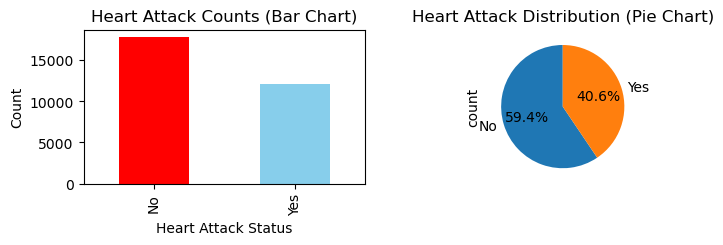

In [246]:
counts = df.heart_attack.value_counts()
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
counts.plot(kind='bar', color=['red','skyblue'], legend=False)
plt.xlabel('Heart Attack Status')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.title('Heart Attack Counts (Bar Chart)')
plt.subplot(1,2,2)
counts.plot(kind='pie', autopct='%1.1f%%', labels=['No','Yes'], color=['red','skyblue'], startangle=90)
plt.title('Heart Attack Distribution (Pie Chart)')
plt.show()

### 🧬 Types of Features

The dataset includes a comprehensive set of demographic, clinical, and lifestyle variables, enabling robust analysis of cardiovascular risk.

---

#### 📊 Demographic Features

- **age**: Integer (Range: 25–90)  
- **gender**: Categorical (`'Male'`, `'Female'`)  
- **region**: Categorical (`'Urban'`, `'Rural'`)  
- **income_level**: Categorical (`'Low'`, `'Middle'`, `'High'`)  

---

    #### 🩺 Clinical Features

    - **hypertension**: Binary (0 = No, 1 = Yes)  
    - **diabetes**: Binary (0 = No, 1 = Yes)  
    - **cholesterol_level**: Numeric  
    - **blood_pressure_systolic**: Numeric  
    - **blood_pressure_diastolic**: Numeric  
    - **fasting_blood_sugar**: Numeric  
    - **cholesterol_hdl**: Numeric  
    - **cholesterol_ldl**: Numeric  
    - **triglycerides**: Numeric  
    - **obesity**: Binary (0 = No, 1 = Yes)  
    - **waist_circumference**: Numeric  
    - **previous_heart_disease**: Binary (0 = No, 1 = Yes)  
    - **medication_usage**: Binary (0 = No, 1 = Yes)  
    - **EKG_results**: Categorical (`'Normal'`, `'Abnormal'`)  

---

#### 💡 Lifestyle Features

- **smoking_status**: Categorical (`'Never'`, `'Past'`, `'Current'`)  
- **alcohol_consumption**: Categorical (`'Moderate'`, `'High'`, `nan`)  
- **physical_activity**: Categorical (`'Low'`, `'Moderate'`, `'High'`)  
- **dietary_habits**: Categorical (`'Healthy'`, `'Unhealthy'`)  
- **air_pollution_exposure**: Categorical (`'Low'`, `'Moderate'`, `'High'`)  
- **stress_level**: Categorical (`'Low'`, `'Moderate'`, `'High'`)  
- **sleep_hours**: Continuous Numeric  
- **family_history**: Binary (0 = No, 1 = Yes)  
- **participated_in_free_screening**: Binary (0 = No, 1 = Yes)  

---

📌 **Note**:  
This dataset’s richness across clinical and behavioral dimensions supports deep exploratory data analysis (EDA) and the development of predictive models for cardiovascular events like heart attacks.


In [247]:
unique_vals = []
for i in df.columns:
    unique_vals.append({f'{i}:{df[i].unique()}'})
unique_vals

[{'age:[60 53 62 73 52 64 49 61 57 32 34 48 42 58 44 38 72 55 37 56 41 59 47 51\n 77 54 40 31 39 63 46 67 33 50 66 71 25 45 65 84 68 81 43 36 70 35 87 90\n 82 80 30 76 74 29 69 79 78 27 75 28 85 86 83 26 88 89]'},
 {"gender:['Male' 'Female']"},
 {"region:['Rural' 'Urban']"},
 {"income_level:['Middle' 'Low' 'High']"},
 {'hypertension:[0 1]'},
 {'diabetes:[1 0]'},
 {'cholesterol_level:[211 208 231 202 232 238 165 186 121 196 190 234 193 125 134 271 185 230\n 132 163 200 191 219 142 180 205 228 265 177 192 176 207 174 225 170 130\n 251 201 159 172 153 258 221 189 214 105 255 149 128 199 131 139 133 168\n 188 285 252 216 220 212 116 182 250 175 246 215 226 240 210 147 254 227\n 243 223 146 241 173 256 244 198 247 187 164 217 218 152 161 303 203 206\n 245 151 249 181 178 183 166 184 162 204 156 179 171 158 270 222 136 194\n 154 253 167 236 209 266 263 148 242 195 239 235 118 113 229 123 117 197\n 233 273 224 272 150 310 298 169 257 268 155 145 213 248 237 160 141 259\n 111 275 144 127 264 1

# Exploratory Data Analysis 

#### Focus: What features show meaningful differences between patients with and without heart attacks?

Numeric Features

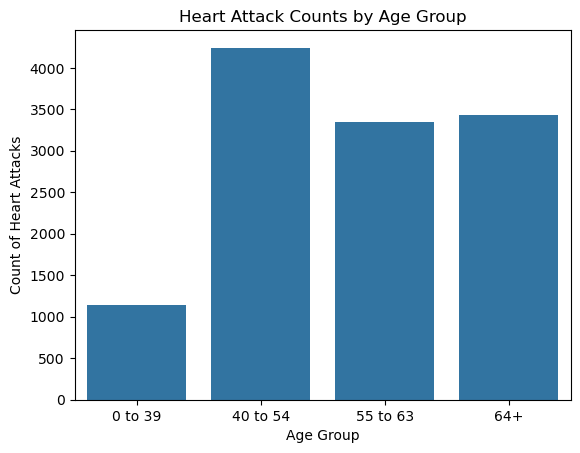

In [248]:
df['age_group'] = np.where(
    df['age'] < 40, 1, np.where(
        df['age'] < 55, 2, np.where(
            df['age'] < 64, 3, 4
        )
    )
)
counts = df.groupby('age_group')['heart_attack'].value_counts().unstack()
counts.columns = ['No Heart Attack', 'Heart Attack']
sns.barplot(data=counts.reset_index(), x='age_group', y='Heart Attack')
plt.xticks([0, 1, 2, 3], ['0 to 39', '40 to 54', '55 to 63', '64+'])
plt.xlabel('Age Group')
plt.ylabel('Count of Heart Attacks')
plt.title('Heart Attack Counts by Age Group')
plt.show()


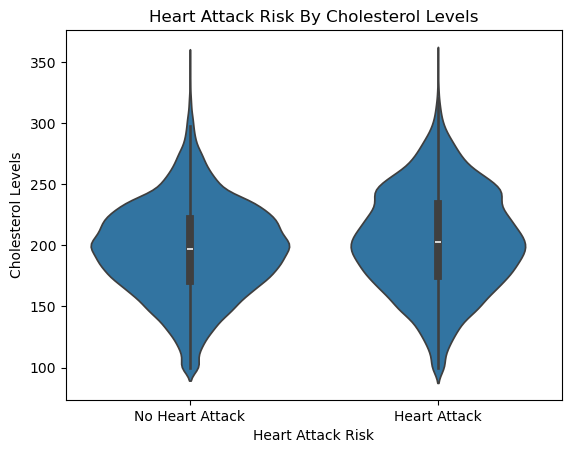

In [249]:
sns.violinplot(data=df, x='heart_attack', y='cholesterol_level')
plt.xticks([0,1],['No Heart Attack', 'Heart Attack'])
plt.title('Heart Attack Risk By Cholesterol Levels')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Cholesterol Levels')
plt.show()

Categorical Features

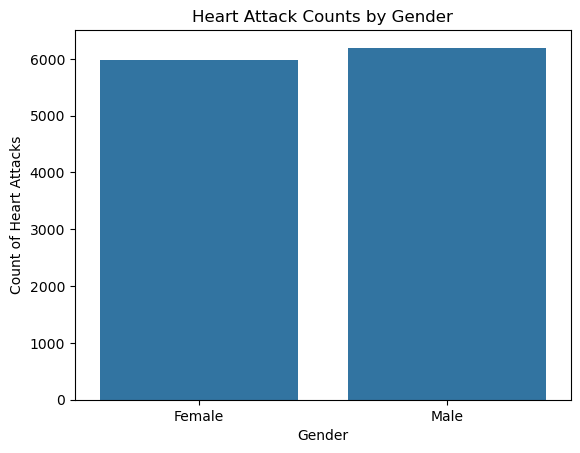

In [250]:
counts = df.groupby('gender')['heart_attack'].value_counts().unstack()
counts.columns = ['No Heart Attack', 'Heart Attack']
sns.barplot(data=counts.reset_index(), x='gender', y='Heart Attack')
plt.xlabel('Gender')
plt.ylabel('Count of Heart Attacks')
plt.title('Heart Attack Counts by Gender')
plt.show()


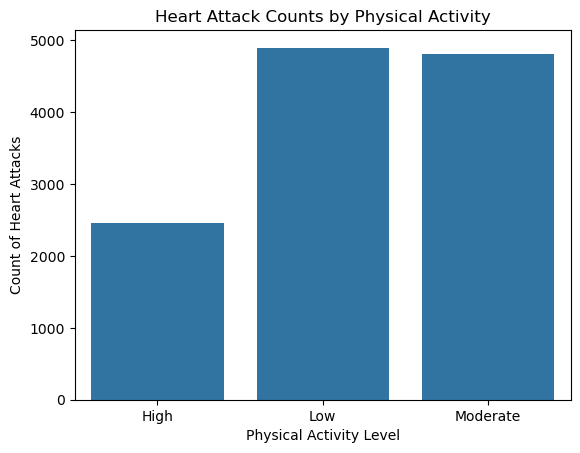

In [251]:
counts = df.groupby('physical_activity')['heart_attack'].value_counts().unstack()
counts.columns = ['No Heart Attack', 'Heart Attack']
sns.barplot(data=counts.reset_index(), x='physical_activity', y='Heart Attack')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count of Heart Attacks')
plt.title('Heart Attack Counts by Physical Activity')
plt.show()

Correlations (numeric features only)

In [252]:
num_df = df.select_dtypes(include='number')
num_corrs = num_df.corr()[['heart_attack']].sort_values(by='heart_attack', ascending=False)
num_corrs = num_corrs[1:]
num_corrs

,heart_attack
previous_heart_disease,0.281420
hypertension,0.267961
diabetes,0.189587
obesity,0.166805
age_group,0.107021
age,0.105092
cholesterol_level,0.091452
waist_circumference,0.073093
fasting_blood_sugar,0.071354
medication_usage,0.005347


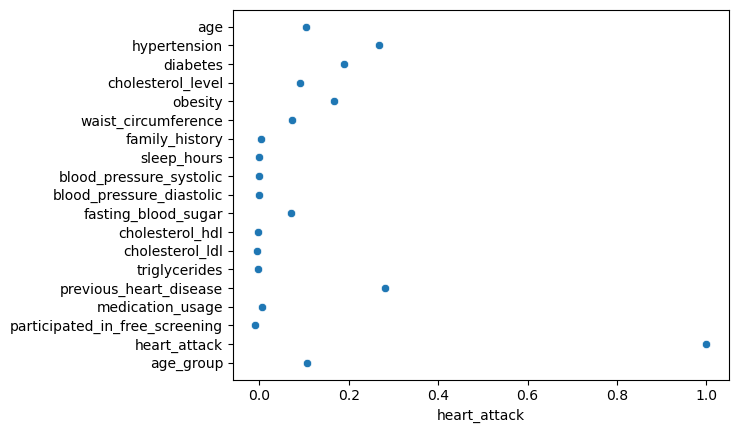

In [253]:
sns.scatterplot(data=num_df.corr(), x='heart_attack', y=num_df.columns.tolist())
plt.show()

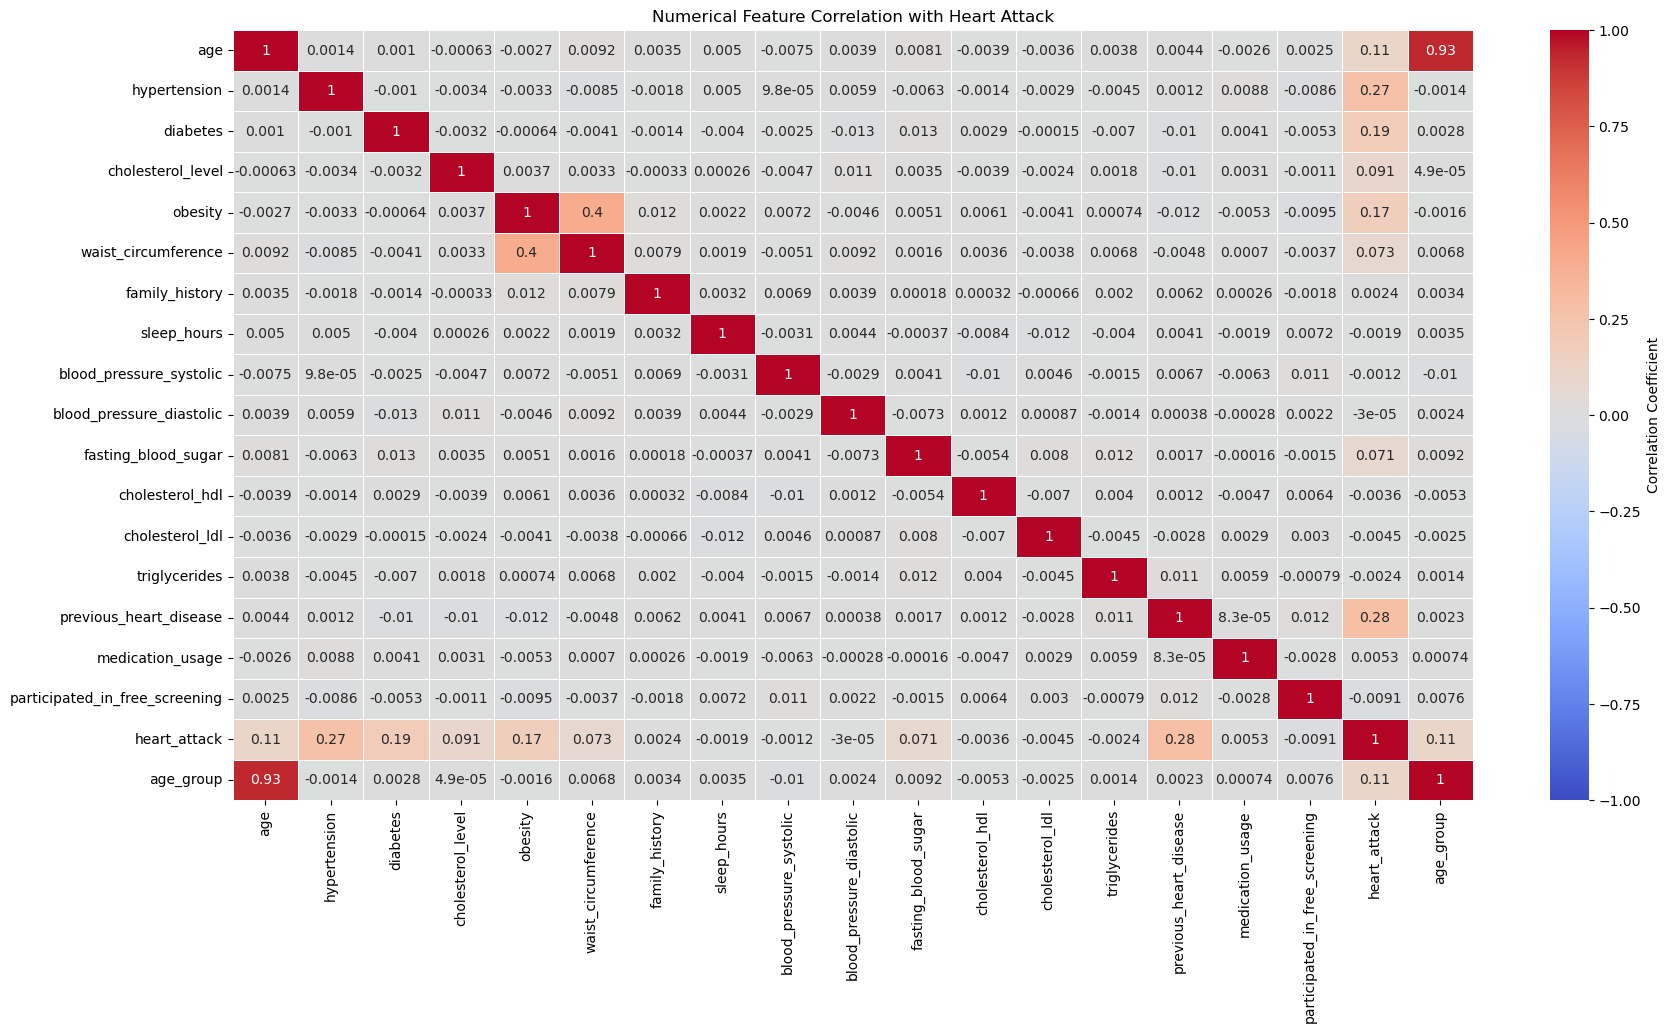

In [254]:
plt.figure(figsize=(20,10))
sns.heatmap(num_df.corr(), 
            annot=True, 
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Numerical Feature Correlation with Heart Attack')
plt.show()

## Feature Engineering
### Several new features were derived:
- age_group: Binned age into categories (e.g., 18–30, 31–45…)
- health_risk_score: Composite risk index based on conditions like hypertension, cholesterol, diabetes
- obesity_risk_score: Derived from waist_circumference, BMI (if available), and obesity status
- stress_to_sleep_ratio: stress_level / sleep_hours
- mean_arterial_pressure: Calculated as: MAP = Diastolic BP + 1/3 (Systolic BP − Diastolic BP)  
- triglyceride-hdl-ratio: triglycerides / cholesterol_hdl

## Encoding Categorical Variables:
Categorical variables such as gender, region, and EKG_results were encoded using label encoding:
- gender_encoded: 0 = Female, 1 = Male
- region_encoded: numeric mapping of regions
- alcohol_consumption: ordinal encoding reflecting severity

In [255]:
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('None')
stress_mapping = {
    'Low': 1,        
    'Moderate': 2,   
    'High': 3        
}
df['stress_level'] = df['stress_level'].map(stress_mapping)
smoking_mapping = {
    'Never': 1, 
    'Past': 2, 
    'Current': 3  
}
df['smoking_status'] = df['smoking_status'].map(smoking_mapping)
alcohol_consumption_mapping = {
    'None': 1, 
    'Moderate': 2, 
    'High': 3  
}
df['alcohol_consumption'] = df['alcohol_consumption'].map(alcohol_consumption_mapping)
physical_activity_mapping = {
    'Low': 1, 
    'Moderate': 2, 
    'High': 3  
}
df['physical_activity'] = df['physical_activity'].map(physical_activity_mapping)
dietary_habits_mapping = {
    'Unhealthy': 1, 
    'Healthy': 2, 
}
df['dietary_habits'] = df['dietary_habits'].map(dietary_habits_mapping)
air_pollution_mapping = {
    'Low': 1, 
    'Moderate': 2, 
    'High': 3  
}
df['air_pollution_exposure'] = df['air_pollution_exposure'].map(air_pollution_mapping)
income_level_mapping = {
    'Low': 3, 
    'Middle': 2, 
    'High': 1  
}
df['income_level'] = df['income_level'].map(income_level_mapping)
df['age_group'] = np.where(
    df['age'] < 40, 1, np.where(
        df['age'] < 55, 2, np.where(
            df['age'] < 64, 3, np.where(
                df['age'] < 65, 4, 5
            )
        )
    )
)
df['health_risk_score'] = (
    df['hypertension'] +
    df['diabetes'] +
    df['obesity'] +
    df['family_history'] +
    df['smoking_status'] +
    df['alcohol_consumption'] +
    (1 - df['physical_activity']) +
    (1 - df['dietary_habits']) +
    df['air_pollution_exposure'] +
    df['stress_level'] +
    df.income_level
)
df['obesity_risk_score'] = np.where(df['gender'] == 'Male' , df['obesity'] * 1 + (df['waist_circumference'] > 102) * 0.5, df['obesity'] * 1 + (df['waist_circumference'] > 88) * 0.5)
df['stress_to_sleep_ratio'] = df['stress_level'] / df['sleep_hours']
df['mean_arterial_pressure'] = (2* df['blood_pressure_systolic'] + df['blood_pressure_diastolic']) / 3 
df['triglyceride-hdl-ratio'] = df['triglycerides'] / df['cholesterol_hdl']
cat_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(exclude='object')
encoder = LabelEncoder()
for cols in cat_df:
    cat_df[cols+'_encoded'] = encoder.fit_transform(cat_df[cols])
cat_df = cat_df.select_dtypes(exclude='object')
df = pd.concat([cat_df, num_df], axis=1)

# Feature Importances & Modelling

Focus: What features actually help predict heart attacks?

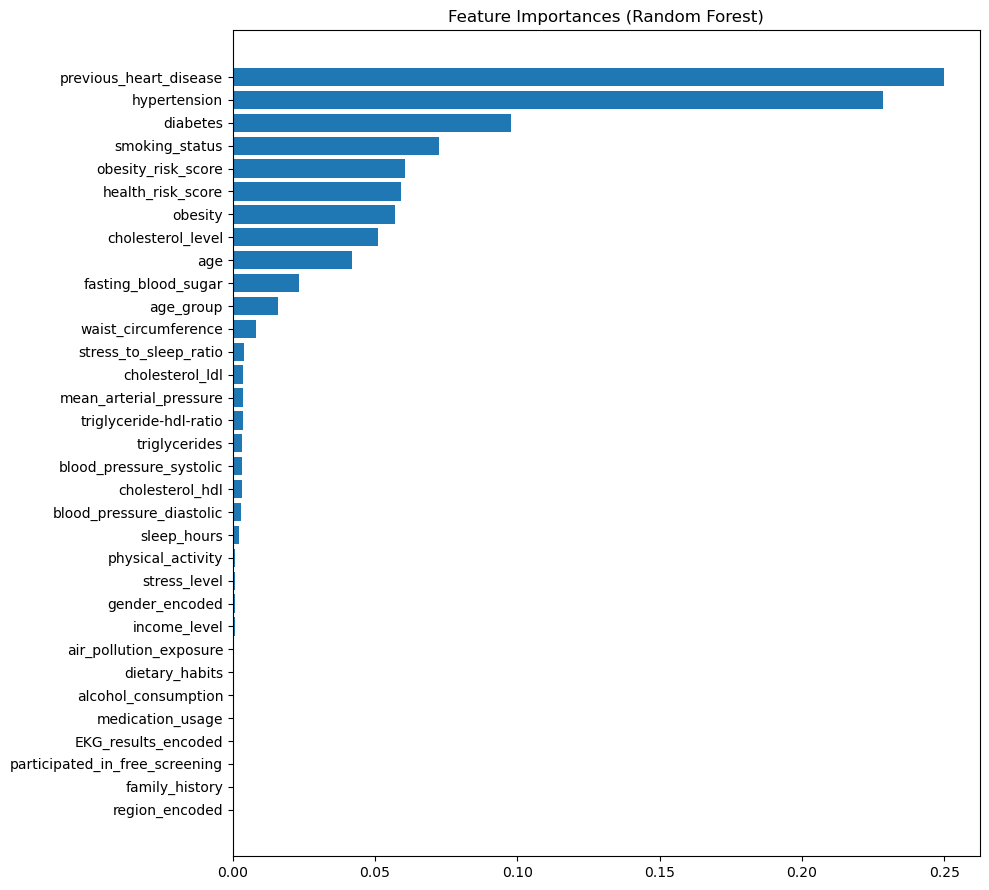

In [256]:
x = clean_df.drop('heart_attack', axis=1)
y = clean_df['heart_attack']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)
SEED = 42
rf =  RandomForestClassifier(
    criterion='entropy',
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=3,
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10,9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 📝 5. Insights & Recommendations

### 🔍 Key Risk Indicators (Top Features)

Based on the Random Forest feature importance analysis, the top predictors of heart attack risk are:

1. **Previous heart disease**
2. **Hypertension**
3. **Diabetes**
4. **Smoking status**
5. **Obesity**

These features show the strongest associations with heart attack outcomes and should be prioritized in risk assessments and screening strategies.

---

### 🌏 Public Health Impact in Indonesia

- **Who is Most at Risk**  
  Individuals with a history of heart disease, hypertension, or diabetes, as well as current smokers and those who are obese, face the highest risk. This is especially concerning among aging populations in both urban and rural settings.

- **How Early Can We Detect?**  
  Many of the top risk factors—such as blood pressure, blood sugar levels, and body mass index—can be measured early and relatively easily, enabling timely intervention.

- **Feasibility in Rural Clinics**  
  Features like blood pressure, obesity (via BMI), and smoking status require minimal equipment and can be assessed by trained health workers, making them suitable for use in rural or under-resourced areas.

---

### 🩺 Policy & Clinical Use

- **Integration into Screening Programs**  
  The top features identified can be used to design or enhance screening tools for early detection. Community-based programs and free health screenings could focus on these specific indicators to identify high-risk individuals.

- **Mobile App Potential**  
  A small set of these high-impact features could power a simple risk calculator or mobile health app, aiding both individuals and community health workers in identifying those at risk.

- **Promoting Affordable, Data-Based Prevention**  
  Interventions targeting modifiable factors like smoking, hypertension, and obesity offer a cost-effective approach for reducing cardiovascular risk in the population, especially in lower-income and rural communities.
